# A Tutorial on Statistical Learning for Scientific Data Processing

From [this tuorial](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

> This tutorial will explore statistical learning, the use of machine learning techniques with the goal of statistical inference: drawing conclusions on the data at hand.

## Statistical learning: the setting and the estimator object in scikit-learn

![Algorithms](./img/plot_classifier_comparison.jpg)

### Datasets

* Datasets are represented as 2D arrays, and understood as lists of multi-dimensional observations
* Samples versus feature (instances versus attributes)

In [1]:
# Check out the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

Dataset is composed of 150 observations of irises (instances), each described by 4 features (attributes)

In [3]:
# Check out the digits dataset
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [4]:
import pylab as pl 
pl.imshow(digits.images[-1], cmap=pl.cm.gray_r)

In [5]:
# Reshape dataset to be used with sklearn
data = digits.images.reshape((digits.images.shape[0], -1))

In [9]:
# Original shape
digits.images

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

In [10]:
# New shape
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Estimators Objects

> __Fitting data__: the main API implemented by scikit-learn is that of the estimator. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

    estimator.fit(data)

> __Estimator parameters__: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

    estimator = Estimator(param1=1, param2=2)
    estimator.param1
    # --> 1

> __Estimated parameters__: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

    estimator.estimated_param_

## Supervised learning: predicting an output variable from high-dimensional observations

![Supervised ML](./img/supervised_classification.jpg)

### Nearest Neighbor and the Curse of Dimensionality

> The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

In [16]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

__Nearest Neighbors Clasifier__: [look here](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

__Training/Testing sets__: Train and test your estimators with different sets of data. Split single set, if that's all you've got.

In [18]:
# Split iris data in train and test data
# A random permutation, to split the data randomly

np.random.seed(0)
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [21]:
# Predicted
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [20]:
# Actual
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

__Curse of Dimensionality__: [look here](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

### Linear Model: from Regression to Sparsity

In [22]:
# The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure)
# measured on 442 patients, and an indication of disease progression after one year

diabetes = datasets.load_diabetes()

diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

__Linear Regression__: [look here](https://en.wikipedia.org/wiki/Linear_regression)

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [26]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898218

In [27]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and Y.
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905724

__Shrinkage (Ridge Regression)__: [look here](https://en.wikipedia.org/wiki/Tikhonov_regularization)

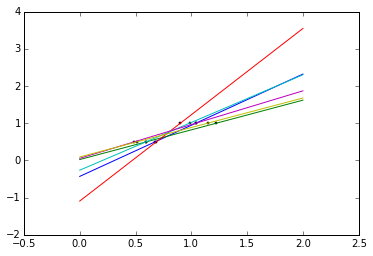

In [32]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import pylab as pl
np.random.seed(0)

%matplotlib inline
pl.figure()

for _ in range(6):
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

> A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression.

> This is an example of bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance.

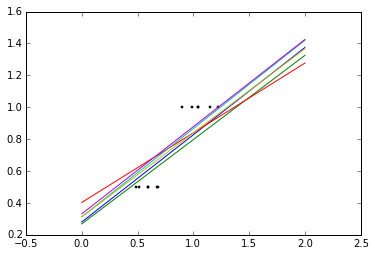

In [33]:
regr = linear_model.Ridge(alpha=.1)

pl.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test)) 
    pl.scatter(this_X, y, s=3) 

In [34]:
# We can choose alpha to minimize left out error, this time using the diabetes dataset rather 
# than our synthetic data
from __future__ import print_function

alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58511106838835303, 0.58520730154446743, 0.58546775406984897, 0.58555120365039148, 0.58307170855541623, 0.57058999437280111]


__Sparcity__

> To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones

__Lasso__: [look here](https://en.wikipedia.org/wiki/Lasso_(statistics))

In [35]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train
            ).score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
# Coefficient of the features in the decision function
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


__Classification__: [look here](https://en.wikipedia.org/wiki/Statistical_classification)

In [37]:
# Logistic regression
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

__Multiclass Classification__

> If you have several classes to predict, an option often used is to fit one-versus-all classifiers and then use a voting heuristic for the final decision.

__Shrinkage and Sparsity with Logistic Regression__

> The C parameter controls the amount of regularization in the LogisticRegression object: a large value for C results in less regularization. `penalty="l2"` gives Shrinkage (i.e. non-sparse coefficients), while `penalty="l1"` gives Sparsity.

In [39]:
# Classify digits dataset with knn and logistic regression
from sklearn import datasets, neighbors, linear_model

# Digits dataset
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

# Train/test 90/10
X_train = X_digits[:.9 * n_samples]
y_train = y_digits[:.9 * n_samples]
X_test = X_digits[.9 * n_samples:]
y_test = y_digits[.9 * n_samples:]

# Classifiers
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

# Output
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.938889


/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/matt/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### Support Vector Machines

> Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the observations around the separating line (more regularization); a large value for C means the margin is calculated on observations close to the separating line (less regularization).

For more, [look here](https://en.wikipedia.org/wiki/Support_vector_machine).

__Linear SVMs__

In [40]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

__Using Kernels__

> Classes are not always linearly separable in feature space. The solution is to build a decision function that is not linear but may be polynomial instead. This is done using the kernel trick that can be seen as creating a decision energy by positioning kernels on observations.

In [41]:
# Linear Kernel
svc = svm.SVC(kernel='linear')

In [43]:
# Polynomial Kernel
svc = svm.SVC(kernel='poly', degree=3)     # degree: polynomial degree

In [44]:
# Radial Basis Function Kernel
svc = svm.SVC(kernel='rbf')                # gamma: inverse of size of radial kernel

__Interactive Example__

See SVM GUI [here](http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#example-applications-svm-gui-py)